Here, we are importing in the relevant libraries needed to execute the code. Os, pandas, and numpy will be used to process the raw dataset and ensure that the data is ready for the machine learning tools we use. The statsmodels libraries will be used to import the relevant methods and functions to execute the two-stage linear regression. Matplotlilb and seaborn will be used to plot and visually display the results of our linear regression.

In [47]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns



Here we are loading in the dataset and preprocessing it using the fillna method to ensure there are no gaps in the data and to replace gaps with a 0.

In [48]:
def load_data(file_name):
    current_dir = os.getcwd()
    os.chdir(current_dir)
    data = pd.read_csv(file_name)
    # Drop rows with NaN values
    data.fillna('0')
    return data

# OLS Regression


In [49]:
df2 = load_data('/Users/anvith/Desktop/ECON 470/mergedReplicationData3.csv')

df2

,Unnamed: 0,isocode,country_x,ln_maddison_pcgdp2000,ln_export_area,ln_export_pop,colony0,colony1,colony2,colony3,...,LNYR2013,LNYR2014,LNYR2015,LNYR2016,LNYR2017,LNYR2018,LNYR2019,LNYR2020,LNYR2021,LNYR2022
0,0,AGO,Angola,6.670766,7.967493,14.399250,0,0,0,1,...,8.529388,8.519587,8.076310,7.500922,7.799497,7.840120,7.692272,7.279943,7.563966,8.006516
1,1,BDI,Burundi,6.354370,1.140843,4.451658,0,0,0,0,...,5.487067,5.552256,5.667670,5.491165,5.497764,5.446999,5.379773,5.379102,5.398876,5.556925
2,2,BEN,Benin,7.187657,8.304137,13.308970,0,0,1,0,...,7.101919,7.132102,6.948564,6.956374,6.998760,7.085431,7.065516,7.123458,7.215910,7.172310
3,3,BFA,Burkina Faso,6.748760,6.413822,11.724286,0,0,1,0,...,6.636345,6.642971,6.449090,6.500969,6.566932,6.658271,6.640176,6.713627,6.789851,6.721470
4,4,BWA,Botswana,8.377471,-2.302585,3.912023,0,1,0,0,...,8.769756,8.831132,8.677565,8.765857,8.810660,8.846183,8.808543,8.678473,8.887210,8.954012
5,5,CAF,Central African Republic,6.472346,1.171314,8.052058,0,0,1,0,...,5.864275,5.978524,5.863290,5.919258,6.027653,6.077487,6.055398,6.076424,6.133696,6.056920
6,6,CIV,Ivory Coast,7.189922,5.096793,10.843699,0,0,1,0,...,7.551215,7.661066,7.571258,7.600500,7.656026,7.738724,7.736651,7.761775,7.868399,7.818596
7,7,CMR,Cameroon,7.016610,4.944928,10.331063,0,0,1,0,...,7.351889,7.397386,7.243996,7.262675,7.299704,7.374040,7.338685,7.338973,7.411107,7.354675
8,8,COG,Congo,7.702556,5.623267,12.391068,0,0,1,0,...,8.221385,8.195281,7.806024,7.653259,7.708734,7.906637,7.827618,7.606521,7.840106,7.882022
9,9,COM,Comoros,6.364751,-2.302585,3.912023,0,0,1,0,...,7.375249,7.383174,7.187609,7.213228,7.254593,7.333897,7.320393,7.326194,7.363578,7.303098


here we are importing multiple libraries from the larger sklearn library to ensure we can execute a double lasso regression. LassoCV enables us to use cross-validation on our dataset, train_test_split allows us to split the data into training and testing datasets to ensure we can train the lasso regression before executing it on the testing dataset. StandardScaler allows us to scale the features of our dataset by reducing the impact of outliers on the dataset while maintaining the information contained within the dataset. Mean_squared_error and r2_score allows us to evaluate the effectiveness of our regression by identifying the relevant variables at each stage of the double lasso.

In [50]:

from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
def doubleLasso(df, target_column, independent_vars):
    # Extracting the independent variables (X) and the dependent variable (y) from the DataFrame
    X = df[independent_vars].values
    y = df[target_column].values

    # Scaling features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # First Lasso: Variable selection
    lasso1 = LassoCV(cv=10, random_state=42,eps=0.001).fit(X_train, y_train)
    selected_features = np.where(lasso1.coef_ != 0)[0]

    # Extracting the selected features for the second Lasso
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Second Lasso: Estimation using selected features
    lasso2 = LassoCV(cv=10, random_state=42).fit(X_train_selected, y_train)

    # Printing selected features and their coefficients
    # Convert the NumPy array to a list

    selected_features_list = selected_features.tolist()
    
    # Use the list to index independent_vars
    print(f"Selected Features: {[independent_vars[i] for i in selected_features_list]}")
    # Create a dictionary that maps each selected feature to its coefficient
    
    coef_dict = dict(zip([independent_vars[i] for i in selected_features_list], lasso2.coef_))
    
    return coef_dict

In [51]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Define your independent variables
independent_vars = np.array(['ln_export_area',
       'ln_export_pop', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum',
       'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s', 'region_w',
       'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400','ln_avg_all_diamonds_pop', 'ln_pop_dens_1400',
       'atlantic_distance_minimum', 'indian_distance_minimum',
       'saharan_distance_minimum', 'red_sea_distance_minimum',
       'LN_GDPPC$_2021'] + [f'colony{i}' for i in range(8)] + [f'LNYR{i}' for i in range(1990,2021)])

# Define your data file
data = 'mergedReplicationData3.csv'

# Initialize an empty list to store the coefficients
coefficients = []
# Loop over the years
for year in range(1990, 2021):
    # Define the target column
    target_column = f'YR{year}'

    # Load the data
    df = pd.read_csv(data, usecols=[target_column] + list(independent_vars))
    coef = doubleLasso(df, target_column, independent_vars)
    coefficients.append(coef)

# Convert the list of coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=independent_vars, index=range(1990, 2021))

# Save the DataFrame to a CSV file
coefficients_df.to_csv('coefficients_lasso_final.csv')

/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 9.548e+03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.076e+04, tolerance: 9.548e+03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_pop', 'abs_latitude', 'humid_max', 'island_dum', 'region_w', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_avg_all_diamonds_pop', 'LN_GDPPC$_2021', 'colony2', 'colony5', 'colony7', 'LNYR1990', 'LNYR1992', 'LNYR1994', 'LNYR2018', 'LNYR2019', 'LNYR2020']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+04, tolerance: 9.743e+03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.351e+03, tolerance: 7.679e+03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_pop', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'ln_coastline_area', 'islam', 'legor_fr', 'legor_uk', 'region_s', 'region_w', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'LN_GDPPC$_2021', 'colony0', 'colony1', 'colony4', 'colony5', 'colony7', 'LNYR1990', 'LNYR1991', 'LNYR1995', 'LNYR2018', 'LNYR2019']
Selected Features: ['ln_export_pop', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'ln_coastline_area', 'islam', 'legor_fr', 'region_s', 'region_w', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'LN_GDPPC$_2021', 'colony1', 'colony5', 'colony7', 'LNYR1992', 'LNYR1995', 'LNYR2017', 'LNYR2018', 'LNYR2019', 'LNYR2020']
Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'humid_max', 'ln_coastline_area', 'legor_fr', 'region_s', 'region_w', 'ln_pop_dens_1400', '

/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+04, tolerance: 9.654e+03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.963e+03, tolerance: 9.654e+03
  model = cd_fast.enet_coordinate_descent(


Selected Features: ['ln_export_pop', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'islam', 'legor_fr', 'region_e', 'ln_avg_gold_pop', 'ln_avg_all_diamonds_pop', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony1', 'colony3', 'colony4', 'colony5', 'colony7', 'LNYR1993', 'LNYR1995', 'LNYR2005', 'LNYR2016', 'LNYR2017', 'LNYR2018', 'LNYR2020']
Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'humid_max', 'ln_coastline_area', 'islam', 'legor_fr', 'legor_uk', 'ln_avg_oil_pop', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'saharan_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony2', 'colony4', 'colony5', 'colony7', 'LNYR1995', 'LNYR1997', 'LNYR1998', 'LNYR2017', 'LNYR2018', 'LNYR2020']
Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'humid_max', 'low_temp', 'legor_fr', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony1', 'col

/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+04, tolerance: 1.231e+04
  model = cd_fast.enet_coordinate_descent(


Selected Features: ['ln_export_pop', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_s', 'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'indian_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony1', 'colony3', 'colony4', 'colony5', 'colony7', 'LNYR1990', 'LNYR1993', 'LNYR1996', 'LNYR1999', 'LNYR2002', 'LNYR2005', 'LNYR2008', 'LNYR2013', 'LNYR2020']
Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'humid_max', 'low_temp', 'region_w', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'colony1', 'colony3', 'colony5', 'colony7', 'LNYR1990', 'LNYR1993', 'LNYR2000', 'LNYR2017', 'LNYR2020']
Selected Features: ['ln_export_pop', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'islam',

/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.241e+04, tolerance: 1.042e+04
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+04, tolerance: 1.042e+04
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_pop', 'abs_latitude', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'region_n', 'region_w', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'indian_distance_minimum', 'saharan_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony1', 'colony3', 'colony4', 'colony5', 'colony7', 'LNYR1990', 'LNYR1993', 'LNYR2002', 'LNYR2020']
Selected Features: ['ln_export_pop', 'rain_min', 'humid_max', 'low_temp', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'indian_distance_minimum', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony1', 'colony3', 'colony4', 'colony5', 'colony7', 'LNYR1990', 'LNYR1993', 'LNYR2002', 'LNYR2003', 'LNYR2005', 'LNYR2020']
Selected Features: ['ln_export_pop', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'region_n', 'region_s', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'indian_distance

/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.309e+04, tolerance: 2.776e+04
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.574e+04, tolerance: 2.776e+04
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'islam', 'legor_fr', 'region_n', 'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'ln_avg_all_diamonds_pop', 'indian_distance_minimum', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'colony1', 'colony3', 'colony4', 'colony5', 'colony7', 'LNYR1990', 'LNYR1993', 'LNYR1996', 'LNYR1999', 'LNYR2005', 'LNYR2012', 'LNYR2020']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.947e+04, tolerance: 4.683e+04
  model = cd_fast.enet_coordinate_descent(


Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'region_e', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_pop_dens_1400', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'indian_distance_minimum', 'LN_GDPPC$_2021', 'colony1', 'colony2', 'colony3', 'colony4', 'colony5', 'colony7', 'LNYR1990', 'LNYR1993', 'LNYR1999', 'LNYR2005', 'LNYR2009', 'LNYR2012', 'LNYR2016', 'LNYR2017', 'LNYR2019', 'LNYR2020']
Selected Features: ['ln_export_pop', 'rain_min', 'island_dum', 'legor_fr', 'region_s', 'region_w', 'region_e', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony2', 'colony3', 'colony5', 'colony7', 'LNYR1990', 'LNYR2008', 'LNYR2009', 'LNYR2012', 'LNYR2016', 'LNYR2020']
Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'humid_max', 'ln_coastline_area', 'island_dum', 'region_s', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'red_sea_distance_minimum', 'LN_GDPPC$_2

/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.794e+04, tolerance: 4.773e+04
  model = cd_fast.enet_coordinate_descent(


Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'humid_max', 'ln_coastline_area', 'islam', 'region_n', 'region_w', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'saharan_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony2', 'colony3', 'colony4', 'colony5', 'colony7', 'LNYR1990', 'LNYR1999', 'LNYR2009', 'LNYR2010', 'LNYR2012', 'LNYR2016', 'LNYR2020']
Selected Features: ['ln_export_pop', 'rain_min', 'island_dum', 'islam', 'region_w', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_avg_all_diamonds_pop', 'saharan_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony1', 'colony4', 'colony5', 'colony7', 'LNYR1999', 'LNYR2000', 'LNYR2008', 'LNYR2009', 'LNYR2010', 'LNYR2012', 'LNYR2016', 'LNYR2020']
Selected Features: ['ln_export_pop', 'abs_latitude', 'rain_min', 'island_dum', 'islam', 'region_s', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'saharan_distance_minimum', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'col

Using the results of our double lasso regression, the selected variables will be inserted into the two-stage OLS regression with GDP in 1990, 2000, 2010, and 2021 being the dependent variables in 4 separate regressions. The loops allow us to conduct a regression for each year separately and save the coefficients to .csv file where the results can be analyzed.

In [52]:
import statsmodels.api as sm

# Loop over the years
for year in range(1990, 2021):
    # Define the target column
    target_column = f'YR{year}'

    independent_vars = [
       'ln_export_area', 'ln_export_pop','abs_latitude',
       'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
       'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s',
       'region_w', 'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400'] + [f'colony{i}' for i in range(8)] + [f'LNYR{i}' for i in range(1990,2021)]
    
    coefficients = []

    # Assuming data is a string representing your file path
    data = "/Users/anvith/Desktop/ECON 470/mergedReplicationData3.csv"

    # Load the data
    df = pd.read_csv(data, usecols=[target_column,
       'ln_export_area', 'ln_export_pop','abs_latitude',
       'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
       'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s',
       'region_w', 'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400'] + [f'colony{i}' for i in range(8)] + [f'LNYR{i}' for i in range(1990,2021)])
    
    # Define the independent and dependent variables
    X = df[independent_vars]
    y = df[target_column]
    
    # Add a constant to the independent variables matrix
    X = sm.add_constant(X)
    
    # Perform the OLS regression
    model = sm.OLS(y, X).fit()

   
    
    # Get the coefficients
    coef = model.params
    coefficients.append(coef)

# Convert the list of coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=['const'] + independent_vars, index=range(1990, 2021))

# Save the DataFrame to a CSV file
coefficients_df.to_csv('coefficients_final.csv')

Here is our first-stage OLS regression using instrumental variables and the endogenous independent variable of ln_export_area to find the predicted value that is a more accurate representation of the variable and will better predict the imapct of slave trade on GDP.

In [53]:
def perform_iv_first_stage(data):
    # Independent instrument variables
    instruments = ['atlantic_distance_minimum', 'indian_distance_minimum', 
                   'saharan_distance_minimum', 'red_sea_distance_minimum']
    X = data[instruments]
    y = data['ln_export_area']
    X = sm.add_constant(X) # Adding a constant term

    first_stage = sm.OLS(y, X).fit()
    data['predicted_ln_export_area'] = first_stage.predict(X) # Adding predicted values
    return first_stage, data

# Instrumental Variable Regression - Second Stage


In [54]:
first_stage = perform_iv_first_stage(df2)[0]

first_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_export_area   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     4.545
Date:                Sun, 28 Apr 2024   Prob (F-statistic):            0.00347
Time:                        17:07:57   Log-Likelihood:                -135.48
No. Observations:                  52   AIC:                             281.0
Df Residuals:                      47   BIC:                             290.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        29.1097      6.959      4.183      0.000      15.109      43.110
atlantic_distance_minimum    -1.3140      0.357     -3.683      0.001      -2.032      -0.596
indian_distance_minimum      -1.0954      0.380     -2.884      0.006      -1.859      -0.331
saharan_distance_minimum     -2.4349      0.823     -2.958      0.005      -4.091      -0.779
red_sea_distance_minimum     -0.0019      0.710     -0.003      0.998      -1.431       1.427
==============================================================================
Omnibus:                        5.115   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                2.450
Skew:                          -0.242   Prob(JB):                        0.294
Kurtosis:                       2.054   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our second-stage OLS uses the predicted value of export area along with the GDP value from the chosen year to analyze the impact of slave trade on GDP in 1990, 2000, 2010, and 2021.

In [55]:
def perform_iv_second_stage(data):
    X = data[['predicted_ln_export_area']]
    y = data['ln_maddison_pcgdp2000']
    X = sm.add_constant(X) # Adding a constant term

    second_stage = sm.OLS(y, X).fit()
    return second_stage

# Plotting scatter plots


In [56]:
second_stage = perform_iv_second_stage(df2)

second_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.269
Model:                               OLS   Adj. R-squared:                  0.254
Method:                    Least Squares   F-statistic:                     18.36
Date:                   Sun, 28 Apr 2024   Prob (F-statistic):           8.30e-05
Time:                           17:08:02   Log-Likelihood:                -55.164
No. Observations:                     52   AIC:                             114.3
Df Residuals:                         50   BIC:                             118.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.8114      0.187     41.879      0.000       7.437       8.186
predicted_ln_export_area    -0.2079      0.049     -4.285      0.000      -0.305      -0.110
==============================================================================
Omnibus:                        2.190   Durbin-Watson:                   2.479
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.552
Skew:                           0.416   Prob(JB):                        0.460
Kurtosis:                       3.155   Cond. No.                         7.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our time-series graph shows the impact of slave trade across the years, expanding on the original reserach Nunn did in 2008 by incorporating panel or logintudinal data into the analysis.

In [57]:
def plot_scatter(data, x_var, y_var, title, file_name):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x_var, y=y_var, data=data)
    plt.title(title)
    plt.savefig(file_name)

# Saving regression summary and summary statistics
def print_summary(model, data, independent_vars):
    summary = model.summary().as_text()
    summary_stats = data[independent_vars].describe().to_string()
    print(summary + '\n\nSummary Statistics:\n' + summary_stats)
        



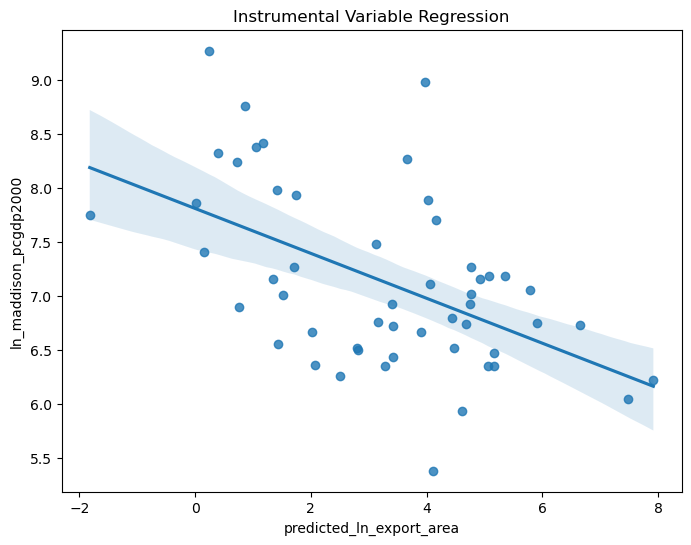

In [58]:
plot_scatter(df2, 'predicted_ln_export_area', 'ln_maddison_pcgdp2000', 'Instrumental Variable Regression', 'iv_regression.png')

Here is our summary of the second stage regression, showing the coefficients and standard errors along with the new confidence intervals using a 97.5% confidence level.

In [59]:
print_summary(second_stage, df2, ['predicted_ln_export_area'])

                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.269
Model:                               OLS   Adj. R-squared:                  0.254
Method:                    Least Squares   F-statistic:                     18.36
Date:                   Sun, 28 Apr 2024   Prob (F-statistic):           8.30e-05
Time:                           17:08:08   Log-Likelihood:                -55.164
No. Observations:                     52   AIC:                             114.3
Df Residuals:                         50   BIC:                             118.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

here we are storing the regression results to .csv file

In [60]:
def save_regression_results_to_csv(results, data, columns, filename):
    """
    Save regression results to a CSV file.

    Parameters:
    results (statsmodels.regression.linear_model.RegressionResultsWrapper): The regression results.
    data (pandas.DataFrame): The DataFrame to save.
    columns (list of str): The columns of the DataFrame to save.
    filename (str): The name of the file to save the results to.
    """
    # Convert the regression results to a DataFrame
    results_df = pd.DataFrame({
        'coefficients': results.params,
        'standard errors': results.bse,
        't-values': results.tvalues,
        'p-values': results.pvalues,
        'conf_int_lower': results.conf_int().iloc[:, 0],
        'conf_int_upper': results.conf_int().iloc[:, 1]
    })

    # Add the specified columns from the original DataFrame
    for column in columns:
        results_df[column] = data[column]

    # Save the DataFrame to a CSV file
    results_df.to_csv(filename)

    # Save the DataFrame to a CSV file
    results_df.to_csv(filename)